**Aisha Muhammad Nawaz  L200921**  
PySpark Lab  
8A BSCS MMD  
16th February 2024

Instructions:
RUN PYSPARK and execute basic commands -Weekly activities will be marked   

TASK1: Your first task is to follow at least one of the uploaded tutorials (either install Spark on your system or run on Colab).  

In [1]:
#Running on Colab ( I was not able to install Spark on my System)
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'

openjdk-8-jdk-headless is already the newest version (8u392-ga-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [2]:
#  Import the libraries we will need
import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [3]:
# Create Spark session and ContextRun PySpark.
# create the session
conf = SparkConf().set("spark.ui.port","4050")
# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.appName("DataFrame").config('spark.ui.port', '4050').getOrCreate()

In [4]:
spark

TASK2: IN PYSPARK, open any text file and execute the following transformations and actions
filter, map, flat map, count, saveasfile, collect. union, intersection, distinct, and difference commands learn in class.

UPLOAD your work here !!!


In [5]:
nums = sc.parallelize([1,2,3,4])
nums.collect()

[1, 2, 3, 4]

In [6]:
inputfile = sc.textFile("input.txt")

print(inputfile.count()) #using count here
print(inputfile.first())
infile = inputfile.filter(lambda x: "and" in x) #using filter here
print(infile.count())

output1 = inputfile.map(lambda line: line.split(" ")).filter(lambda line: len(line)>5).collect() #using map & collect here
for output in output1:
  print(output)

6
and my name and aishaaa fastnuces
2
['and', 'my', 'name', 'and', 'aishaaa', 'fastnuces']
['why', 'there', 'when', 'how', 'this', 'that', '']


In [7]:
inputfile = sc.textFile("input.txt")
inputfile2=sc.textFile("input2.txt")

output1 = inputfile.union(inputfile2).collect() #using union here
for output in output1:
  print(output)

and my name and aishaaa fastnuces
what name was when
why there when how this that 
this was here
and here
this is from a file
this is from file 2
this is from a file


In [8]:
inputfile = sc.textFile("input.txt")
inputfile2=sc.textFile("input2.txt")

output1 = inputfile.intersection(inputfile2).collect() #using intersection here
for output in output1:
  print(output)

this is from a file


In [9]:
numFile = sc.textFile("nums.txt")  #has 1,2,3,4,4,2

output1 = numFile.distinct().collect() #using distinct here
for output in output1:
  print(output)


1
4
2
3


In [10]:
numFile = sc.textFile("nums.txt")  #has 1,2,3,4,4,2
numFile2=sc.textFile("nums2.txt")  #has 1, 5, 7

output1 = numFile.subtract(numFile2).collect() #using subtract here
for output in output1:
  print(output)

2
2
3
4
4


In [11]:
numFile = sc.textFile("nums.txt")  #has 1,2,3,4,4,2

output1 = numFile.countByValue() #using countByValue here
print(output1)

defaultdict(<class 'int'>, {'1': 1, '2': 2, '3': 1, '4': 2})


In [12]:
numFile = sc.textFile("nums.txt")  #has 1,2,3,4,4,2

output1 = numFile.take(2) #using take here
print(output1)

['1', '2']


In [13]:
nums = sc.parallelize([1,2,3,4,4,2])

output1 = nums.reduce(lambda x, y: x+y) #using reduce here
print(output1)

16


In [14]:
numFile = sc.textFile("nums.txt")  #has 1,2,3,4,4,2
numFile2=sc.textFile("nums2.txt")  #has 1, 5, 7

output1 = numFile.cartesian(numFile2).collect() #using cartesian here
for output in output1:
  print(output)

('1', '1')
('1', '5')
('2', '1')
('2', '5')
('3', '1')
('3', '5')
('1', '7')
('2', '7')
('3', '7')
('4', '1')
('4', '5')
('4', '1')
('4', '5')
('2', '1')
('2', '5')
('4', '7')
('4', '7')
('2', '7')


In [15]:
numFile = sc.parallelize([[0,1],[0,1,2],[0,1,2,3]])

output1 = numFile.flatMap(lambda x:x).collect() #using flatmap here
for output in output1:
  print(output)

0
1
0
1
2
0
1
2
3


In [17]:
numFile = sc.parallelize([[0,1],[0,1,2],[0,1,2,3]])

output1 = numFile.saveAsTextFile('answerHERE.txt') #using savasfile here


TASK3: Explore the SPARKcluster UI (user-interface)


In [18]:
!pip install pyngrok

In [19]:
from pyngrok import ngrok, conf
import getpass

# Set Ngrok authtoken
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()

# Define the port
ui_port = 4050

# Connect to Ngrok and get the public URL
try:
    public_url = ngrok.connect(ui_port).public_url
    print(f" * Ngrok tunnel created: {public_url} -> http://127.0.0.1:{ui_port}")
except Exception as e:
    print(f"Error creating Ngrok tunnel: {e}")

# My Authentication Token 2cSK5j3NB6McxNBPb9wFQQfF2MW_6njVGDJ7hkV1W6e9B7v9F

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
··········


 * Ngrok tunnel created: https://0581-35-236-230-220.ngrok-free.app -> http://127.0.0.1:4050


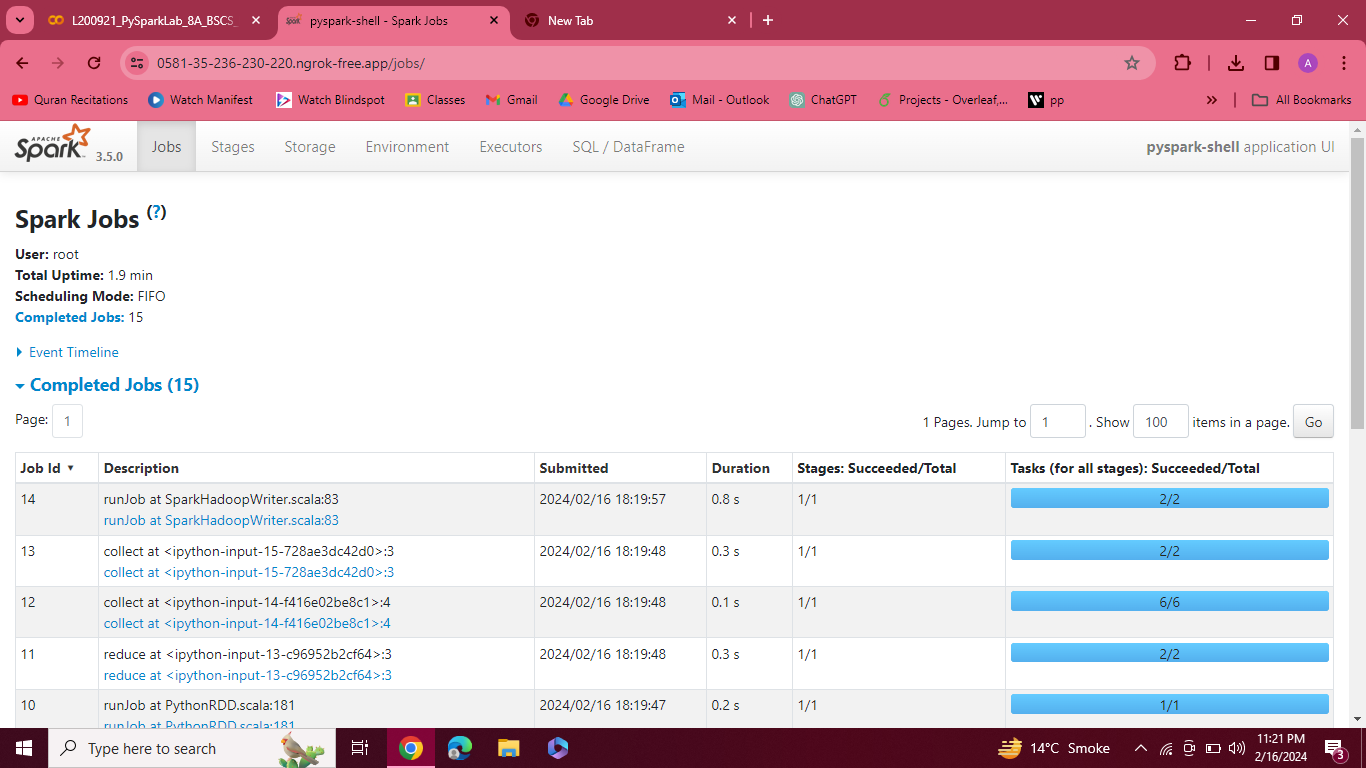

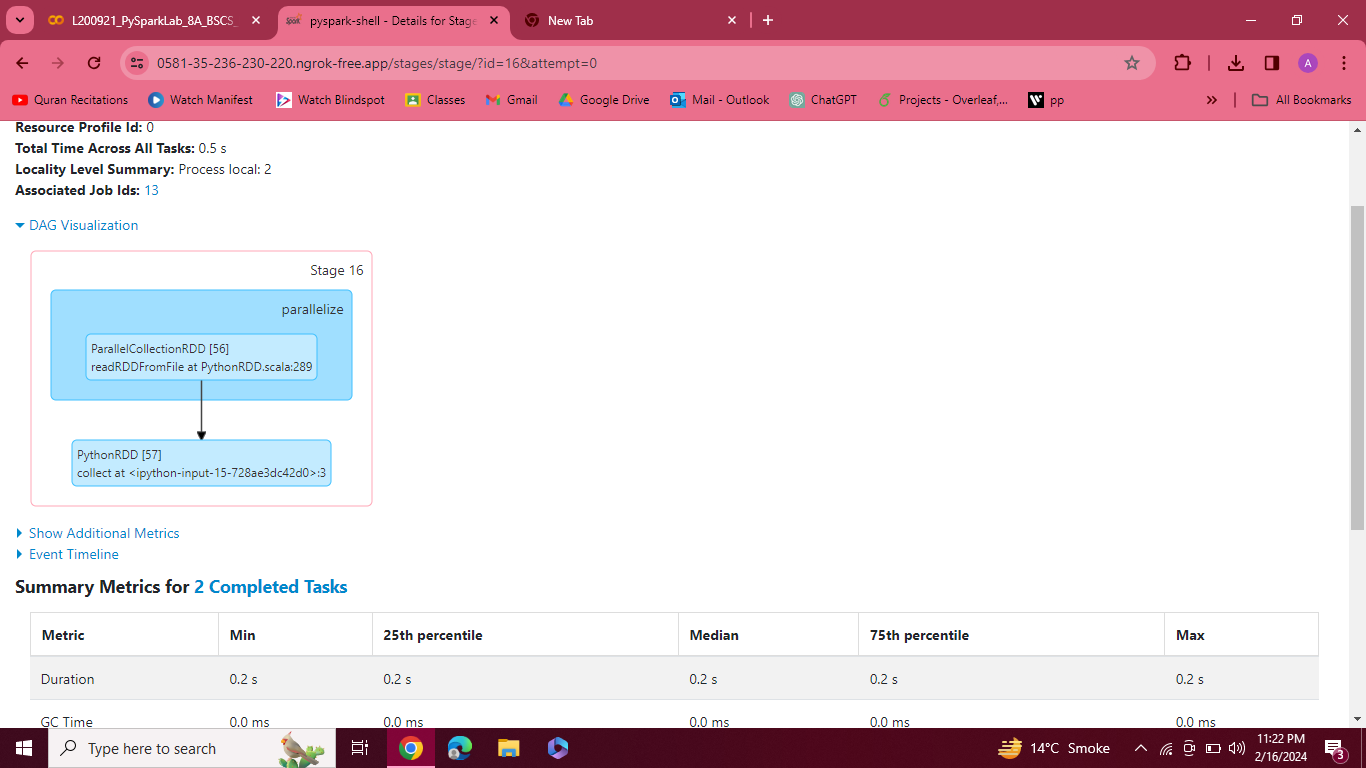

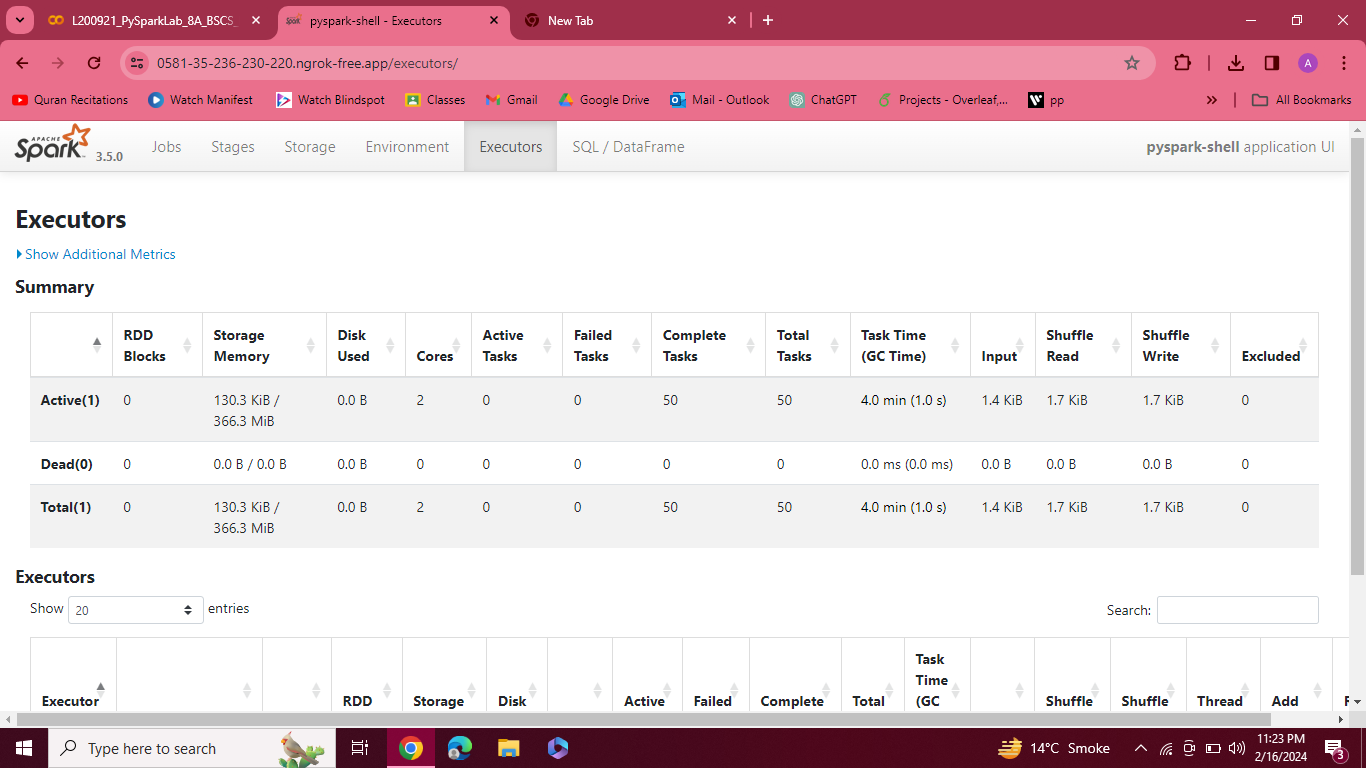

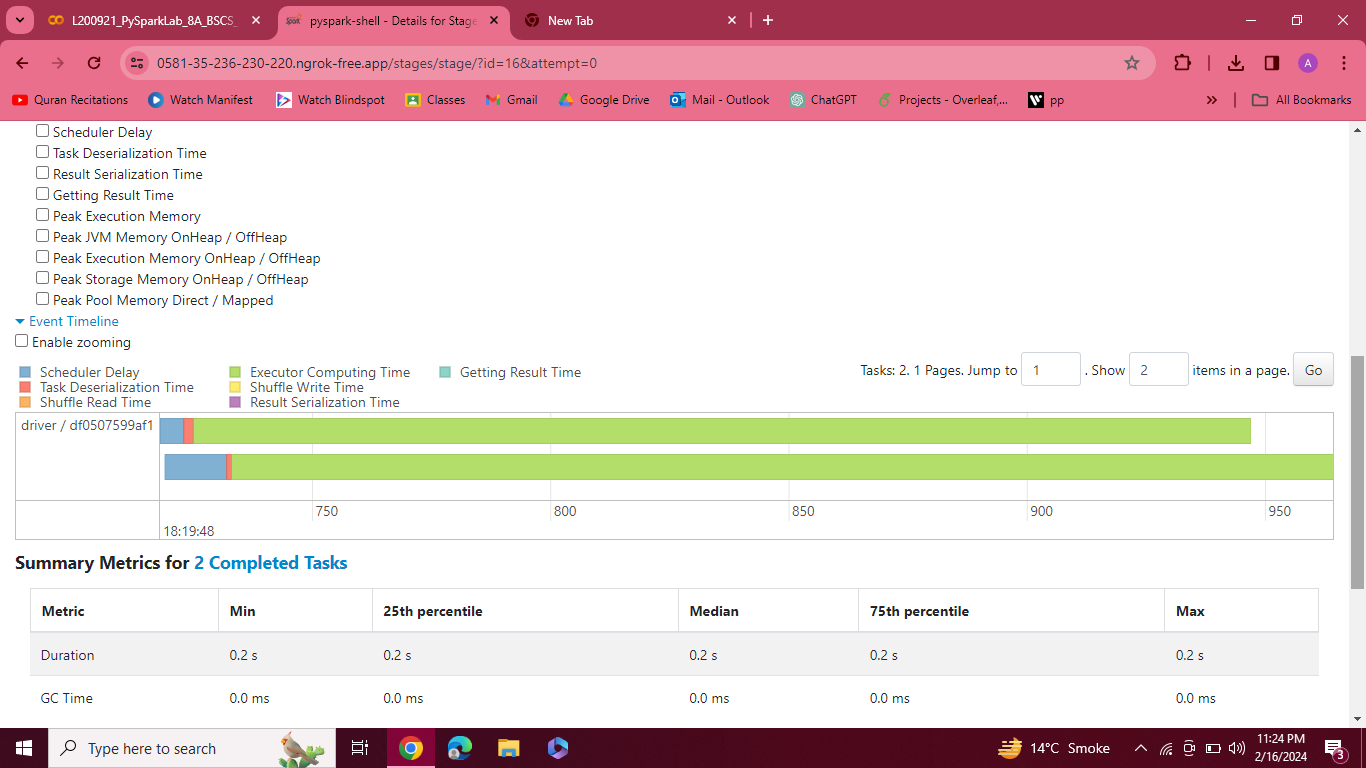